# *Titanic - Machine Learning from Disaster*

## Probelem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Survived**.

## Goal
Using this model, We will try to understand what sort of people were more likely to **survive** than others.

# *Hypothesis Generation*
* Females have more chance of surviving.
* Children have more chance of surviving.
* Upper Class (VIPS) have more chance of surviving.
* People with less siblings have more chance of surviving.
* Person with no family/sibings have more chance of surviving.
* Swimmers have more chance of surviving.


# *Libraries*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
%matplotlib inline

# Import Coounter
from collections import Counter

# Scaling Libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

#train test split
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Score Matrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score as CVS, StratifiedKFold, learning_curve

## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Loading Data.
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
# lets check data
print(f'Train Dataset (row, col): {train.shape} \n')
print('\nTrain Dataset Information:\n')
print(train.info())

print(f'\nTest Dataset (row, col): {test.shape} \n')
print('\nTest Dataset Information:\n')
print(test.info())

print('\nTrain Dataset Values:\n')
train.apply(lambda x:x.unique())


Train Dataset (row, col): (891, 12) 


Train Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset (row, col): (418, 11) 


Test Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

## About Dataset

This dataset is named Titanic Survival. The dataset contains a set of **891** records under **12** attributes:

## Column Name and their Description

* **PassengerId**: Unique passenger ID.
* **Name** : name of passenger.
* **Pclass** : Ticket class (A proxy for **socio-economic status** (SES)).
* **Sex** : gender of passenger.
* **Age** : age of passenger.
* **SibSp**: number of siblings/spouse of passenger.
* **Parch** : number of parents of passenger.
* **Ticket** : ticket number.
* **Fare** :Passenger fare.
* **Cabin** : Cabin number.
* **Embarked** : Port of Embarkation.

## Variable Notes
**Pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* **Sibling** = brother, sister, stepbrother, stepsister
* **Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* **Parent** = mother, father
* **Child** = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore **parch=0** for them.


# *Future Analysis*



In [5]:
# Check Dupicates
train.drop_duplicates(inplace=True)

In [6]:
# Data Summery
train.describe(include=[object, np.number])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Observations
* Most passengers are **Lower class passengers**.
* Most passengers are **male**.
* Average Age of passengers is **28** oldest passenger=80, youngest=0.42 (about 5 months).
* Most passengers are **alone**.
* Average Fare is 14.45 pounds



In [7]:
# Missing values
(train.isnull().sum()/train.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Missing values
* Age has **19.8%** missing values.
* Cabin has **77%** missing values.
* Embarked has **0.22%** missing values

* ### Data Exploration
Lets combine both datasets since both are similier
Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Missing values treatment
* Outlier treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Variable transformation
* Variable creation

In [8]:
# Combining Datasets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After combining the datasets (row,col): ', data.shape)

After combining the datasets (row,col):  (1309, 13)


* ### Missing Values
1. Numeric Values
2. Categorial Values

In [9]:
# Fill empty and NaNs values with NaN
# Missing values
(data.isnull().sum()/data.shape[0]) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
source          0.000000
dtype: float64

* Age here is **continuies value** and also age is corelated with **parch/sibling** and since there is subpopulation in age is **children** having higher chance of **surrvival** we need visulize the age **carefully**.

In [10]:
# Lets deal with Age first
data.Age.describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

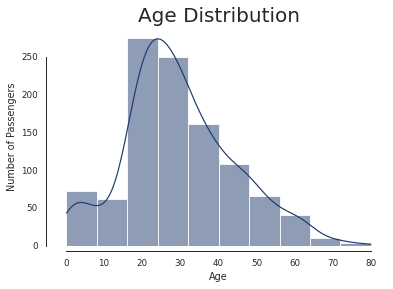

In [11]:
# Age Distribution
ax = sns.histplot(x=data['Age'], bins=10, kde=True)
ax.set_ylabel('Number of Passengers')
ax.set_title('Age Distribution', fontsize=20)
sns.despine(offset=5, trim=True)


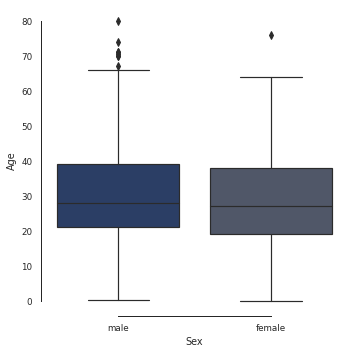

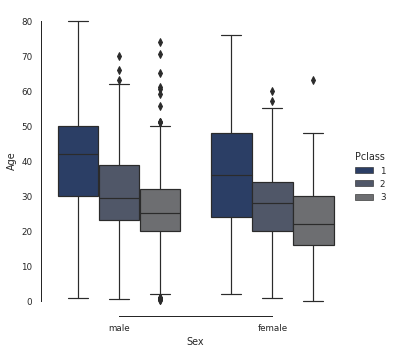

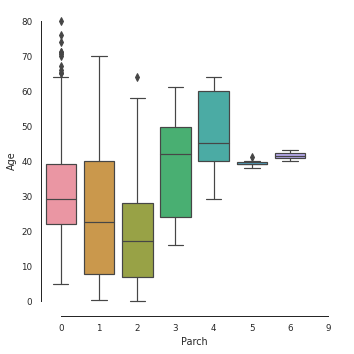

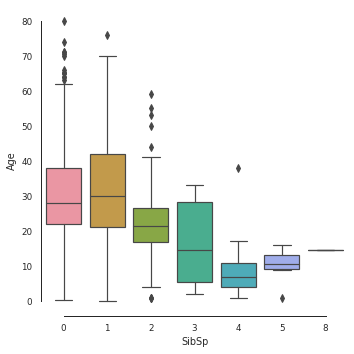

In [12]:
# Explore Age

ax = sns.catplot(y="Age",x="Sex",data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="Sex",hue="Pclass", data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="Parch", data=data,kind="box")
ax.despine(offset=1, trim=True)
ax = sns.catplot(y="Age",x="SibSp", data=data,kind="box")
ax.despine(offset=1, trim=True)



## Observations
* Age and **Sex** has almost **same distribution**.
* **1st class** passenger are **older** then **2nd class**, and 2nd are **older** then **3rd class**.
* Person having more **parents/children** are **older**.
* Person having more **siblings/spouse** are **younger**.

Text(0.5, 1.0, 'Correlation of Age\n')

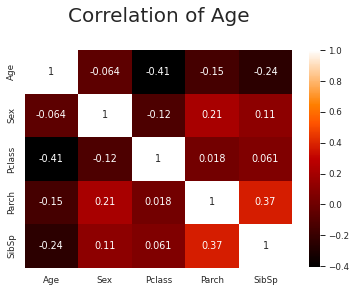

In [13]:
# Convert Sex 0, 1 into male female
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
ax = sns.heatmap(data=data[['Age','Sex','Pclass', 'Parch', 'SibSp']].corr(), cmap='gist_heat' , annot=True)
ax.set_title('Correlation of Age\n', fontsize=20)

### Observations
* Above heatmap **confirms the catplots except Parch**. age is not correlated with sex, But **negativly correlated with Parch, Pclass, SibSp**

In [14]:
# Imputate missing values of age wrt Parch, SibSp, Parch, Pclass
data['Age'] = data.groupby(['Parch', 'SibSp', 'Pclass'])['Age'].apply(lambda i:i.fillna(i.median()))
data['Age'] = data['Age'].fillna(data['Age'].median())

# delete cabin data becuase it contains % missing data
data = data.drop('Cabin', axis=1)

# fill missing values in Embarked with mode
data.Embarked = data.Embarked.fillna('S')

# Fill missing values in Fare with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [15]:
print('Missing Values afer imputation \n')
(data.isnull().sum()/data.shape[0]) * 100

Missing Values afer imputation 



PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
source          0.000000
dtype: float64

* ### Outliers

In [16]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

#  Show the outliers rows
print("Outliers \n\n")
train.loc[Outliers_to_drop]
#  Show the outliers rows

Outliers 




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,train
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,train
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,train
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,train
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,train
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,train
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,train
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,train
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,train
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,train


In [17]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,train


#### Veriable Identification
* Numeric Data
* Categorical Data

In [19]:
# # assign male and female to 0,1 in Sex
# data['Sex'] = data['Sex'].map({0:'male', 1:'female'})

# # assign 1st, 2nd, 3rd class to Pclass
# data['Pclass'] = data['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

In [20]:
# Separating Numeric and categorical Data
num_df = data.select_dtypes('number')
cat_df = data.select_dtypes('object')

In [21]:
#Numeric Data
num_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0.0,3,0,22.0,1,0,7.2500
1,2,1.0,1,1,38.0,1,0,71.2833
2,3,1.0,3,1,26.0,0,0,7.9250
3,4,1.0,1,1,35.0,1,0,53.1000
4,5,0.0,3,0,35.0,0,0,8.0500


In [22]:
cat_df.head()

,Name,Ticket,Embarked,source
0,"Braund, Mr. Owen Harris",A/5 21171,S,train
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,train
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,train
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,train
4,"Allen, Mr. William Henry",373450,S,train


* # *Data Visualization*
* Numeric Data
* Categorical Data

Text(0.5, 1.0, 'Correlation of Survived with  Numeric Data\n')

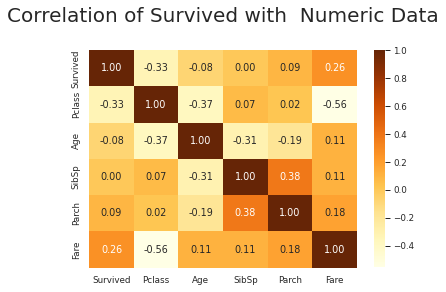

In [23]:
# Check Correlation
ax = sns.heatmap(data=train[num_df.columns[1:]].corr(), cmap='YlOrBr', fmt='.2f', annot=True)
ax.set_title('Correlation of Survived with  Numeric Data\n', fontsize=20)

### Realizations
* Only **Fare** seems to have a **positive** correlation wirh surviving.
* **Pclass** has the **worst** correlation of all with suriving

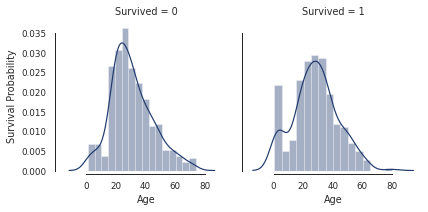

In [24]:
#  Age Vs Survived
ax = sns.FacetGrid(train, col='Survived', margin_titles=True)
ax = ax.map(sns.distplot, 'Age')
ax.set_ylabels('Survival Probability')
# ax.set_titles(['Age Survived', 'Age Not Survived'])
ax.despine(offset=3, trim=True)

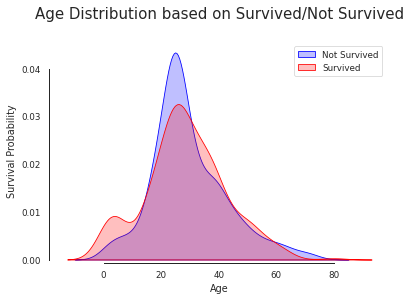

In [25]:
# Explore Age Distro
ax = sns.kdeplot(num_df[num_df["Survived"] == 0]['Age'], color='b', shade=True)
ax = sns.kdeplot(num_df[num_df["Survived"] == 1]['Age'], color='r', shade=True)
ax.set_xlabel("Age")
ax.set_ylabel("Survival Probability")
ax.set_title('Age Distribution based on Survived/Not Survived\n', fontsize=15)
sns.despine(offset=3, trim=True)
ax.legend(['Not Survived', 'Survived'])

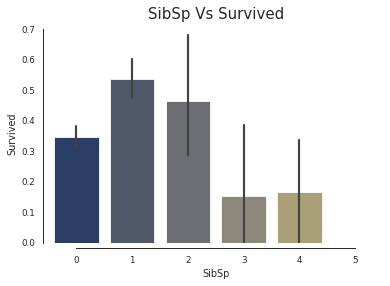

In [26]:
# Explore Survived based on SibSp
ax = sns.barplot(x='SibSp', y='Survived', data=train)
ax.set_title('SibSp Vs Survived', fontsize=15)
sns.despine(offset=5, trim=True)


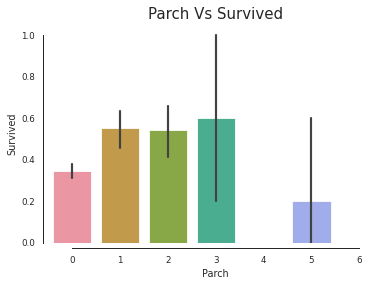

In [27]:
# Explore Survived based on parch
ax = sns.barplot(x='Parch', y='Survived', data=train)
ax.set_title('Parch Vs Survived', fontsize=15)
sns.despine(offset=5, trim=True)

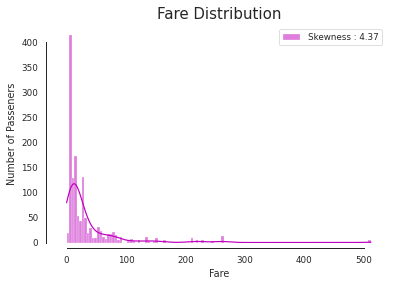

In [28]:
ax = sns.histplot(num_df['Fare'], color='m', label="Skewness : %.2f"%(num_df["Fare"].skew()), kde=True)
ax.set_ylabel('Number of Passeners')
ax.set_title('Fare Distribution', fontsize=15)
ax = ax.legend(loc="best")
sns.despine(offset=5, trim=True)



In [29]:
# Applying Log to reduce skewness
data['Fare'] = data['Fare'].apply(lambda i:np.log(i) if i > 0 else 0)

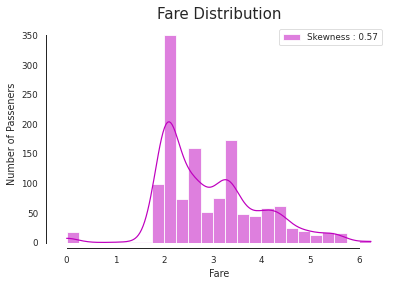

In [30]:
ax = sns.histplot(data['Fare'], color='m', label="Skewness : %.2f"%(data["Fare"].skew()), kde=True)
ax.set_ylabel('Number of Passeners')
ax.set_title('Fare Distribution', fontsize=15)
ax = ax.legend(loc="best")
sns.despine(offset=5, trim=True)

### Realizations
* Seems like there are more chances of **survivial** those who are **younger**, also we can clearly see there a peak from (0-5) **children** in 2nd chart **indecating** more chances of **surviving**.
* Passengers with **1 or 2 sibSp** have heigher chance of **surviving**
* **Small families** have more chance to **survive**, more than **single (Parch 0)**, medium (Parch 3,4) and large families (Parch 5,6 ). be carefull with 3 Parch as it has **standard deviation** 
* Fare is largly **skewed** towords **right** we fix that with **np.log** and skewness clearly **reduced after log transformation**. 

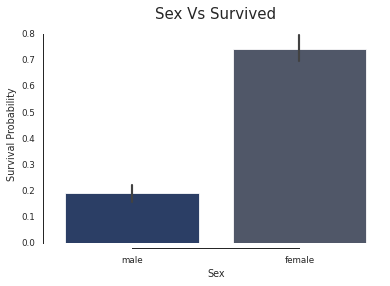

In [31]:
#Explore categorical Data

#Explore Survived based on Sex
ax = sns.barplot(x='Sex', y='Survived',data=data)
ax.set_title('Sex Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['male', 'female'])
sns.despine(offset=5, trim=True)

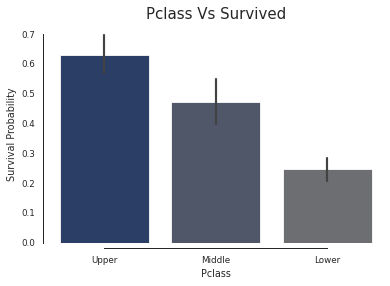

In [32]:
# Explore Survived with Pclass
ax = sns.barplot(x='Pclass', y='Survived', data=train)
ax.set_title('Pclass Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
sns.despine(offset=5, trim=True)

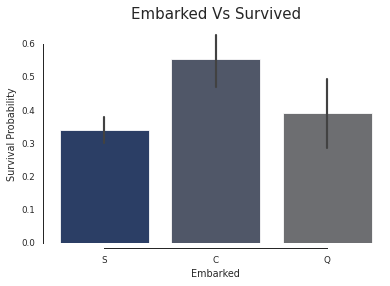

In [33]:
# Explore Survived with Embarked
ax = sns.barplot(x='Embarked', y='Survived', data=train)
ax.set_title('Embarked Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
sns.despine(offset=5, trim=True)

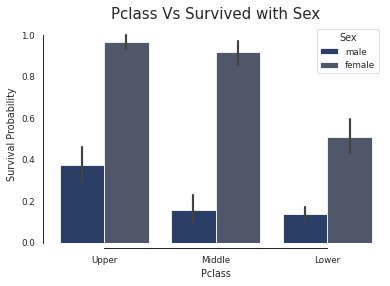

In [34]:
# Explore Survived with Pclass and Sex
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
ax.set_title('Pclass Vs Survived with Sex', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
sns.despine(offset=5, trim=True)

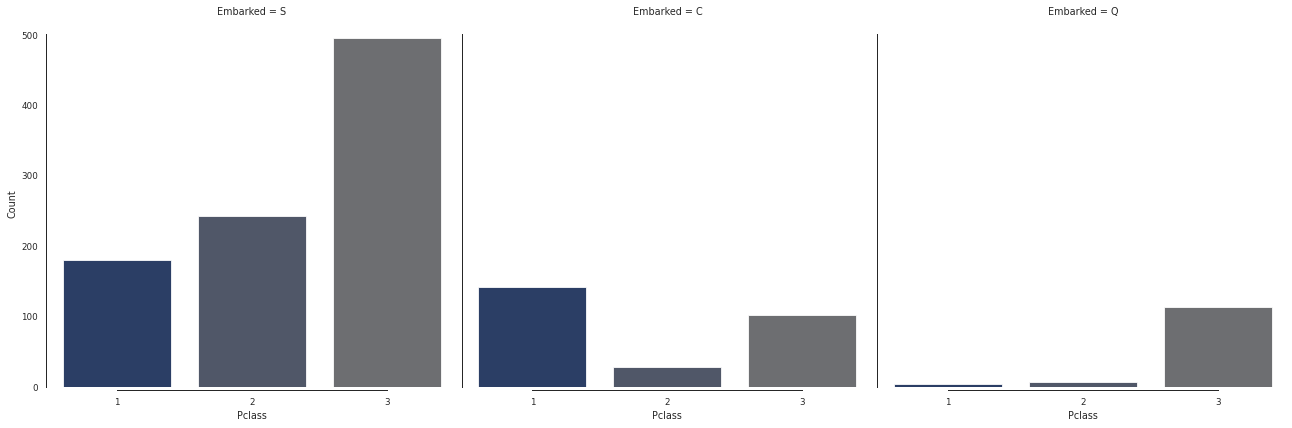

In [35]:
# Explore Survived with Pclass and Embarked
ax = sns.catplot(data=data, x='Pclass', col='Embarked', kind='count', height=6)
ax.despine(offset=3, trim=True)
ax = ax.set_ylabels('Count')

### Realizations
* **Female passengers** have higher chance of **surviving**, So **Sex**, might play an **important role** in the prediction of the survival.
* **Upper Class** passengers have higher chance of **surviving**
* **Upper Class Female** passengers have higher chance of **surviving**
* Passengers coming from **Cherbourg** (C) have higher chance of **surviving**, because most **Upper class** passengers are coming from **Cherbourg** (C), where as **lower** and **Middle** class are from **Southampton** (S) and **Queenstown** (Q) respectivley.

* ### **Future Engeneering**

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,S,train
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,S,train


In [37]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### Name Title
* We have different **titles** with names (**Mr/Miss/Lady**) etc.
* Since some passenger with **distingused title** may be preferred during the **evacuation**, it is interesting to add them to the model.

In [38]:
## Finding Titles
data['Title'] = data['Name'].apply(lambda i:i.rsplit(',')[1].split('.')[0].strip())
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

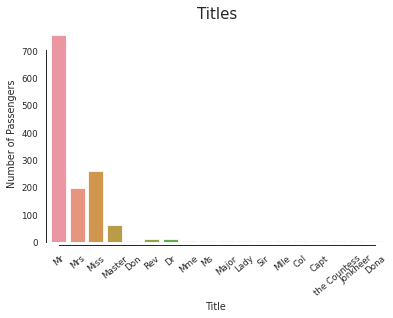

In [39]:
# Lets see Titles
ax = sns.countplot(data=data, x='Title')
ax.set_title('Titles', fontsize=15)
ax.set_ylabel('Number of Passengers')
sns.despine(offset=3, trim=True)
ax = plt.setp(ax.get_xticklabels(), rotation=40)


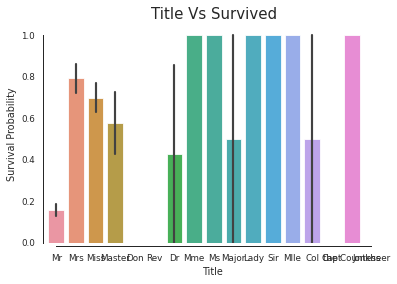

In [40]:
ax = sns.barplot(data=data[data['source'] == 'train'], x='Title', y='Survived')
ax.set_title('Title Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
sns.despine(offset=3, trim=True)

### Realizations
* total **17 titles**, but they can be **reduced**, lets convert them into **title categories**.
* It looks like the **rare titles** have more chances of **surviving**.

In [41]:
# Convert Title into categries
data['Title'] = data['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'the Countess', 'Jonkheer',
       'Dona'], 'others')
data['Title'] = data['Title'].map({'Mr':0, 'Mrs':1, 'Miss':1, 'Master':2, 'others':3})

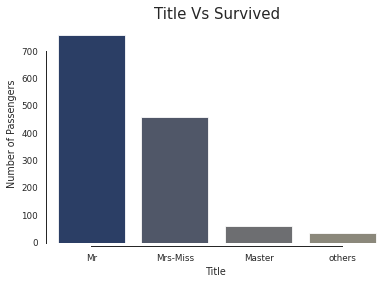

In [42]:
ax = sns.countplot(data=data, x='Title')
ax.set_ylabel('Number of Passengers')
ax.set_title('Title Vs Survived', fontsize=15)
ax = ax.set_xticklabels(['Mr', 'Mrs-Miss', 'Master', 'others'])
sns.despine(offset=3, trim=True)


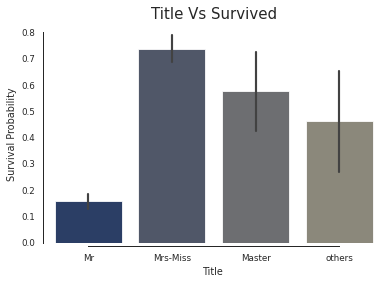

In [43]:
# Drop Name columns we don't need that now
ax = sns.barplot(data=data[data['source'] == 'train'], x='Title', y='Survived')
ax.set_title('Title Vs Survived', fontsize=15)
ax.set_ylabel('Survival Probability')
ax = ax.set_xticklabels(['Mr', 'Mrs-Miss', 'Master', 'others'])
sns.despine(offset=3, trim=True)


### Realizations
* Women and Children First

In [44]:
# Lets create new Feature called family size. +1 for passenger himself
data['Fsize'] = data['SibSp'] + data['Parch'] + 1 

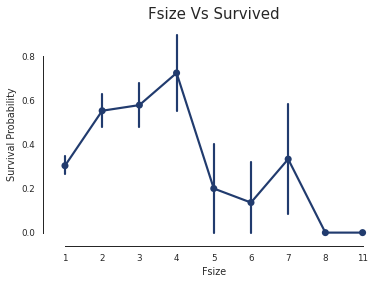

In [45]:
ax = sns.pointplot(x='Fsize', y='Survived', data=data[data['source'] == 'train'])
ax.set_title('Fsize Vs Survived', fontsize=15)
ax.set_ylabel("Survival Probability")
sns.despine(offset=3, trim=True)

### Realizations
* Family size seems to be **important**, larger family size has **worst chance of surviving**.

In [46]:
#Lets Create Family Category
def f_size(i):
    if i ==1:
        return 'Single'
    if i ==2:
        return 'SmallF'
    if i==3 or i == 4:
        return 'MedF'
    if i>4:
        return 'LargeF'
    else:
        return 'nan'
data['Fsize'] = data['Fsize'].apply(lambda i:f_size(i))

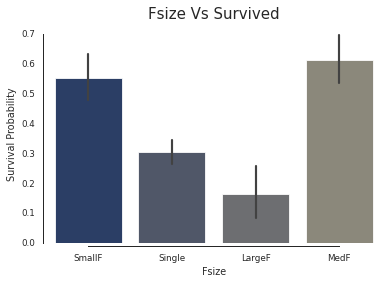

In [47]:
ax = sns.barplot(x='Fsize',y="Survived",data=data[data['source'] == 'train'])
ax.set_title('Fsize Vs Survived', fontsize=15)
ax.set_ylabel("Survival Probability")
sns.despine(offset=3, trim=True)


### Realizations
* It looks like **Med and Small Families** have more chances of **surviving**.

In [48]:
# Lets Deal with Ticket
data['Ticket'] = data.Ticket.apply(lambda i:i.replace('/', '',).replace('.', '').strip().split(' ')[0])
data['Ticket'] = data.Ticket.apply(lambda i:'X' if i.isdigit() else i)

* ### **Variable transformation**

In [49]:
# Label Encoding 
data=pd.get_dummies(data=data, columns=['Pclass', 'Sex','Ticket', 'Embarked','Title', 'Fsize'],
                     prefix=['Pc', 'Sex','Tkt', 'Em','T', 'Fm'])

In [50]:
# Unncessery Columns 
test_ids = data[data['source'] == 'test']['PassengerId']
final_data = data.drop(['PassengerId', 'Name','SibSp','Parch'], axis=1)

# Separate Train and test data
final_train = final_data[final_data['source'] == 'train']
final_test = final_data[final_data['source'] == 'test']
final_train = final_train.drop('source', axis=1)
final_test = final_test.drop(['source','Survived'], axis=1)
final_train.head()

,Survived,Age,Fare,Pc_1,Pc_2,Pc_3,Sex_0,Sex_1,Tkt_A,Tkt_A4,...,Em_Q,Em_S,T_0.0,T_1.0,T_2.0,T_3.0,Fm_LargeF,Fm_MedF,Fm_Single,Fm_SmallF
0,0.0,22.0,1.981001,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,1.0,38.0,4.266662,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,26.0,2.070022,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1.0,35.0,3.972177,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,35.0,2.085672,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


# *Machine Learning Models*
![Explantion](https://en.proft.me/media/science/ml_types2.png)
Let's divide our dataset into two variables.
* **X** as the features we defined earlier. 
* **y** as the **Survived** the target value we want to predict.
### Assumptions:
* This is a **Classification** problem.
* Train test **split 8:2** ratio respectively.

### Classification Models
* SVC
* Decision Tree
* AdaBoost
* Random Forest
* Naïve Bayes
* Extra Trees
* Gradient Boosting
* Multiple layer perceprton (neural network)
* KNN
* Logistic regression
* Linear Discriminant Analysis

In [51]:
## Spliting and Scaling
features = final_train.columns[1:]
X = StandardScaler().fit_transform(final_train.drop('Survived', axis =1))
y = final_train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

def cross_val(model, X, y, cv):
    scores = CVS(model, X_train, y_train, cv=cv, n_jobs=4, scoring='accuracy')
    return (scores.mean(), scores.std())

X_train shape: (668, 55)
y_train shape: (668,)
X_test shape: (223, 55)


* ### Models


In [52]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
r_s = 2
classifiers = []

# Algos
classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=r_s))
classifiers.append(DecisionTreeClassifier(random_state=r_s))
classifiers.append(RandomForestClassifier(random_state=r_s))
classifiers.append(ExtraTreesClassifier(random_state=r_s))
classifiers.append(LogisticRegression(random_state=r_s))
classifiers.append(GradientBoostingClassifier(random_state=r_s))
classifiers.append(AdaBoostClassifier(
    DecisionTreeClassifier(random_state=r_s),random_state=r_s,learning_rate=0.1))


score_results = [cross_val(model,X_train, y_train, kfold) for model in classifiers]

In [53]:
# Convert algo scores into Dataframe
algo_df=pd.DataFrame({"CrossValMeans":[float("{:.2f}".format(score[0]*100)) for score in score_results],
                      "CrossValerrors":[float("{:.2f}".format(score[1]*100)) for score in score_results],
                      "Algorithm":["KNeighboors","LinearDiscriminantAnalysis","SVC",
                                  "DecisionTree","RandomForest","ExtraTrees",
                                   "LogisticRegression","GradientBoosting","AdaBoost"]})
# Check df
algo_df=algo_df.set_index('Algorithm')
algo_df

,CrossValMeans,CrossValerrors
Algorithm,,
KNeighboors,79.20,4.77
LinearDiscriminantAnalysis,79.64,3.11
SVC,80.10,3.16
DecisionTree,80.69,4.40
RandomForest,80.23,4.18
ExtraTrees,79.49,3.71
LogisticRegression,80.09,2.85
GradientBoosting,82.64,4.15
AdaBoost,79.20,2.83


Text(0.5, 1.0, 'Cross validation scores')

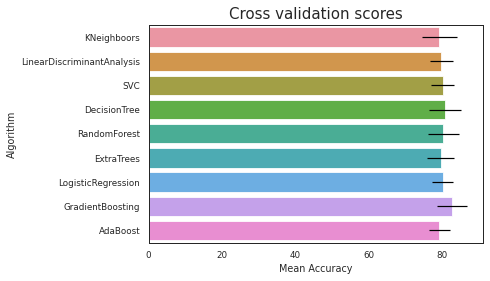

In [54]:
ax = sns.barplot("CrossValMeans",algo_df.index,data = algo_df,**{'xerr':algo_df['CrossValerrors']})
ax.set_xlabel("Mean Accuracy")
ax.set_title("Cross validation scores", fontsize=15)


### Realizations
* **GradientBoosting** has the **highest** accuracy.
* I chose **GradientBoosting**, **SVC**, **RandomForest** and **LogesticRegression**.

## Random Forest
Documentation remaining.

In [55]:

## Model
model = RandomForestClassifier(n_estimators=300,random_state=10,)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

y_predict

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0.])

In [56]:
accuracy_score(y_test, y_predict)

0.8251121076233184

0.219298            Age
0.218597           Fare
0.028040           Pc_1
0.018673           Pc_2
0.045094           Pc_3
0.078401          Sex_0
0.063008          Sex_1
0.000000          Tkt_A
0.000274         Tkt_A4
0.003965         Tkt_A5
0.000000        Tkt_AQ3
0.000000        Tkt_AQ4
0.000046         Tkt_AS
0.000934          Tkt_C
0.004911         Tkt_CA
0.000070    Tkt_CASOTON
0.000000         Tkt_FC
0.000485        Tkt_FCC
0.000048         Tkt_Fa
0.001390       Tkt_LINE
0.000000         Tkt_LP
0.007007         Tkt_PC
0.000058         Tkt_PP
0.000136        Tkt_PPP
0.000000         Tkt_SC
0.000000       Tkt_SCA3
0.000046       Tkt_SCA4
0.000345       Tkt_SCAH
0.000115       Tkt_SCOW
0.000734    Tkt_SCPARIS
0.000254    Tkt_SCParis
0.000871        Tkt_SOC
0.000000        Tkt_SOP
0.002494       Tkt_SOPP
0.000115    Tkt_SOTONO2
0.003340    Tkt_SOTONOQ
0.000151         Tkt_SP
0.007170      Tkt_STONO
0.001786     Tkt_STONO2
0.000000     Tkt_STONOQ
0.003202       Tkt_SWPP
0.003809        

Text(0.5, 1.0, ' feature importance')

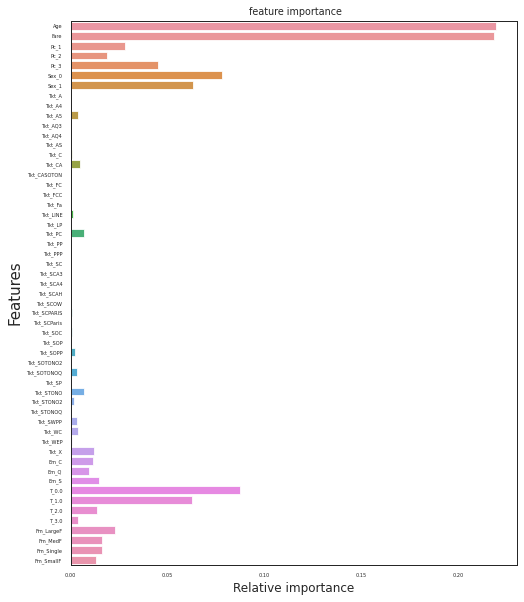

In [57]:
# vasulization of model's perfomance
R_FI = pd.Series(features, model.feature_importances_)
print(R_FI)

plt.figure(figsize = (8,10))
ax = sns.barplot(model.feature_importances_, features, )
ax.set_xlabel("Relative importance",fontsize=12)
ax.set_ylabel("Features",fontsize=15)
ax.tick_params(labelsize=5)
ax.set_title(" feature importance")

### Realizations
* **Age, Fare, Family size, Titles** are mostly the **important** features

In [58]:
# Predict Test Data

# Scaling Test Data
test = StandardScaler().fit_transform(final_test)

#Predict data and convert it into series
test_Survived = pd.Series(model.predict(test), name="Survived")

# Convert it into Dataframe
test_ids = test_ids.reset_index(drop=True)
results = pd.concat([test_ids,test_Survived],axis=1)

# Check Data
results['PassengerId']=results['PassengerId'].astype(int)
results['Survived']=results['Survived'].astype(int)
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [59]:
# Save File
results.to_csv('titanic_submission.csv', index=False)